### Use Case
#### In this project we aim to build a model that estimates the probability of claim frequency. 
#### The steps that will be followed :

- Data Cleaning
- Exploratory data analysis
- Data preprocessing 
- Feasture Selection
- Model Building 
- Model evaluation 


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [47]:
# reading the data set 
claims=pd.read_csv("Car_claims_for_insurance .csv")

In [48]:
# Data overview
print ("Rows     : " ,claims.shape[0])
print ("Columns  : " ,claims.shape[1])
print ("\nFeatures : \n" ,claims.columns.tolist())

Rows     :  10284
Columns  :  21

Features : 
 ['ID', 'KIDSDRIV', 'BIRTH', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'OLDCLAIM', 'CLM_FREQ', 'CLM_AMT', 'CAR_AGE', 'URBANICITY']


In [49]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 21 columns):
ID            10284 non-null int64
KIDSDRIV      10284 non-null int64
BIRTH         10284 non-null object
HOMEKIDS      10284 non-null int64
YOJ           9738 non-null float64
INCOME        9717 non-null object
PARENT1       10284 non-null object
HOME_VAL      9710 non-null object
MSTATUS       10284 non-null object
GENDER        10284 non-null object
EDUCATION     10284 non-null object
OCCUPATION    9619 non-null object
TRAVTIME      10284 non-null int64
CAR_USE       10284 non-null object
BLUEBOOK      10284 non-null object
CAR_TYPE      10284 non-null object
OLDCLAIM      10284 non-null object
CLM_FREQ      10284 non-null int64
CLM_AMT       10284 non-null object
CAR_AGE       9645 non-null float64
URBANICITY    10284 non-null object
dtypes: float64(2), int64(5), object(14)
memory usage: 1.6+ MB


In [50]:
# Remove $ sign and comma 
claims = claims.replace({'\$': '', ',': ''}, regex=True)
claims = claims.replace(',', '')

In [51]:
# propotion of missing values 

missingvalues_prop = (claims.isnull().sum()/len(claims)).reset_index()
missingvalues_prop.columns = ['field','proportion']
missingvalues_prop = missingvalues_prop.sort_values(by = 'proportion', ascending = False)
print(missingvalues_prop)


         field  proportion
11  OCCUPATION    0.064664
19     CAR_AGE    0.062135
7     HOME_VAL    0.055815
5       INCOME    0.055134
4          YOJ    0.053092
0           ID    0.000000
13     CAR_USE    0.000000
18     CLM_AMT    0.000000
17    CLM_FREQ    0.000000
16    OLDCLAIM    0.000000
15    CAR_TYPE    0.000000
14    BLUEBOOK    0.000000
10   EDUCATION    0.000000
12    TRAVTIME    0.000000
1     KIDSDRIV    0.000000
9       GENDER    0.000000
8      MSTATUS    0.000000
6      PARENT1    0.000000
3     HOMEKIDS    0.000000
2        BIRTH    0.000000
20  URBANICITY    0.000000


In [52]:
total = claims.isnull().sum().sort_values(ascending=False)
percent = (claims.isnull().sum()/claims.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
BIRTH,0,0.000000
BLUEBOOK,0,0.000000
CAR_AGE,639,0.062135
CAR_TYPE,0,0.000000
CAR_USE,0,0.000000


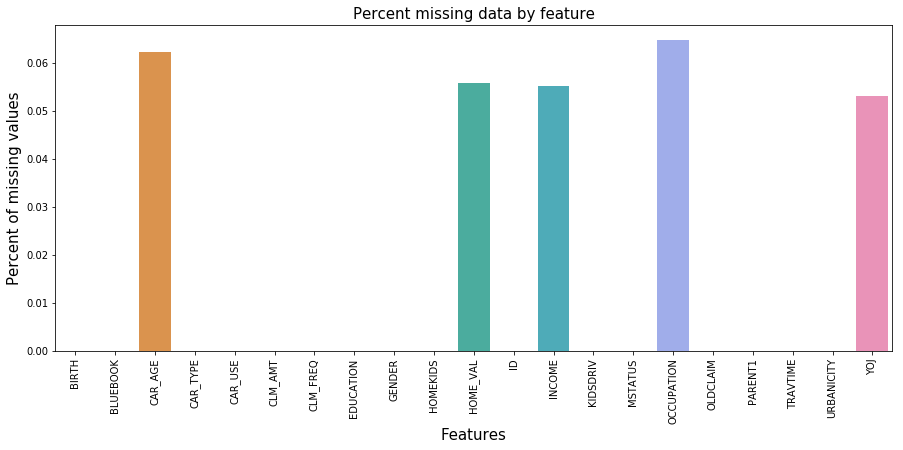

In [53]:
# visulizing missing data 
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

the number of  missing data is 2991 which accounts for 29% of the entire data set. The columns that have missing values are {OCCUPATION ,CAR_AGE, HOME_VAL, YOJ, INCOME}   

In [54]:
# Let's take a deeper look into these columns

my_claims=claims[["OCCUPATION" ,"CAR_AGE", "HOME_VAL", "YOJ","INCOME"]]
print (my_claims)

          OCCUPATION  CAR_AGE HOME_VAL   YOJ  INCOME
0            Student      1.0      NaN   0.0       0
1           Clerical      5.0        0   8.0    2954
2         Home Maker     13.0        0   0.0     NaN
3           Clerical      1.0        0   9.0   14484
4         Home Maker      6.0        0   0.0       0
5            Student      1.0      NaN  12.0   16227
6            Student      8.0        0   0.0       0
7           Clerical     11.0    74994  11.0   11719
8      z_Blue Collar      7.0   158926  10.0   50100
9         Home Maker      7.0        0   0.0       0
10        Home Maker      7.0      NaN   NaN       0
11     z_Blue Collar      NaN   155030   NaN   49522
12           Student      4.0      NaN   0.0     NaN
13     z_Blue Collar      1.0   152243   6.0   40015
14          Clerical      1.0        0   9.0    6284
15           Student      9.0        0  14.0     479
16        Home Maker      NaN        0   0.0       0
17          Clerical      5.0        0   9.0  

We learned that the reason why we have lots of missing values in the income and Home_val columns is because these peaople are students and typically students don't own homes and don't have a stable income. We will convert NAs to 0 to avoid loosing information  

In [55]:
# convert missing values to 0 
claims['HOME_VAL'] = claims['HOME_VAL'].fillna(0)
claims['INCOME'] = claims['INCOME'].fillna(0)
claims['YOJ'] = claims['YOJ'].fillna(0)


In [56]:
# for OCCUPATION column we will replace NA with Noresponse 
claims["OCCUPATION"].fillna("No Response", inplace = True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a126de860>]],
      dtype=object)

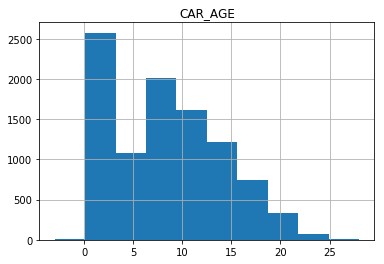

In [57]:
# checking the distrubation of car_age column
claims.hist(column='CAR_AGE')

In [58]:
# using Median to impute the car_age column 
claims.CAR_AGE.fillna(claims.CAR_AGE.median(),inplace=True)

In [59]:
# convert numercial variables that were recorded as objects to float 
claims[['INCOME', 'HOME_VAL', 'BLUEBOOK','CLM_AMT','OLDCLAIM']] = claims[['INCOME', 'HOME_VAL', 'BLUEBOOK','CLM_AMT','OLDCLAIM']].astype('float') 

In [60]:
print(claims.dtypes)

ID              int64
KIDSDRIV        int64
BIRTH          object
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
CAR_TYPE       object
OLDCLAIM      float64
CLM_FREQ        int64
CLM_AMT       float64
CAR_AGE       float64
URBANICITY     object
dtype: object


In [61]:
# fixing tryping errors
claims['MSTATUS'].replace(
    to_replace=['z_No'],
    value='No',
    inplace=True
)



In [62]:
# same for the other columns 
claims.replace(to_replace=["z_F","z_High School", "<High School","z_Blue Collar","z_SUV","z_Highly Rural/ Rural"],
               value=["F","High School","High School","Blue Collar","SUV","Highly Rural/ Rural"], inplace=True)

In [63]:
# taking a look at our data to see if theres any error we have missed. 
claims

,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,351501720,0,12/3/87,0,0.0,0.0,No,0.0,Yes,F,...,Student,43,Private,2600.0,SUV,4656.0,4,0.0,1.0,Highly Rural/ Rural
1,230928278,0,2/18/86,2,8.0,2954.0,Yes,0.0,No,F,...,Clerical,21,Private,3100.0,Sports Car,10099.0,2,6142.0,5.0,Highly Urban/ Urban
2,783842613,0,2/17/86,2,0.0,0.0,Yes,0.0,No,F,...,Home Maker,31,Private,3180.0,Sports Car,25235.0,1,2541.0,13.0,Highly Urban/ Urban
3,514749997,0,8/17/85,0,9.0,14484.0,No,0.0,No,F,...,Clerical,20,Private,2950.0,Sports Car,4518.0,1,4798.0,1.0,Highly Urban/ Urban
4,219676153,0,10/18/84,2,0.0,0.0,Yes,0.0,No,F,...,Home Maker,23,Private,14500.0,SUV,0.0,0,3444.0,6.0,Highly Urban/ Urban
5,783523041,0,2/15/84,3,12.0,16227.0,No,0.0,Yes,M,...,Student,39,Private,20770.0,Van,0.0,0,5640.0,1.0,Highly Urban/ Urban
6,557068515,0,11/21/83,3,0.0,0.0,Yes,0.0,No,M,...,Student,5,Commercial,1500.0,Minivan,0.0,0,3092.0,8.0,Highly Urban/ Urban
7,777360111,0,10/29/83,3,11.0,11719.0,No,74994.0,Yes,M,...,Clerical,51,Private,4270.0,Minivan,0.0,0,3562.0,11.0,Highly Urban/ Urban
8,644999528,0,10/19/83,0,10.0,50100.0,No,158926.0,No,M,...,Blue Collar,41,Commercial,19430.0,Van,0.0,0,44916.0,7.0,Highly Urban/ Urban
9,135848908,0,10/18/83,1,0.0,0.0,Yes,0.0,No,F,...,Home Maker,54,Private,12940.0,Minivan,0.0,0,0.0,7.0,Highly Urban/ Urban


#### Now that we are done with cleaning our data next step is EDA

In [64]:
claims.describe()

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
count,1.028400e+04,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000,10284.000000
mean,5.516867e+08,0.169098,0.720440,9.909471,58165.135648,145841.483081,33.419292,15656.865033,4035.851906,0.800467,1512.156068,8.276643
std,2.596192e+08,0.505435,1.116098,4.631481,48230.079989,130422.581932,15.868332,8431.536933,8737.389822,1.153853,4728.742566,5.532765
min,1.001261e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,0.000000,0.000000,0.000000,-3.000000
25%,3.279047e+08,0.000000,0.000000,8.000000,22657.000000,0.000000,22.000000,9200.000000,0.000000,0.000000,0.000000,3.000000
50%,5.509796e+08,0.000000,0.000000,11.000000,50529.500000,151272.500000,33.000000,14400.000000,0.000000,0.000000,0.000000,8.000000
75%,7.773603e+08,0.000000,1.000000,13.000000,83225.250000,233048.500000,44.000000,20890.000000,4650.500000,2.000000,1145.250000,12.000000
max,9.997993e+08,4.000000,5.000000,19.000000,367030.000000,885282.000000,142.000000,69740.000000,57037.000000,5.000000,123247.000000,28.000000


- On avarage, Peaple tend to apply for insurance policy after 9 years of owning the car. 
- 50% of people in this data set have never made a claim 
- 75% of people have made at least 2 claims 
- 75% of peaple have at least 1 kid at home. 

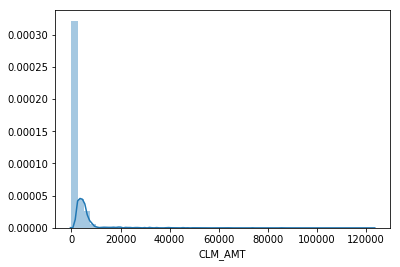

In [65]:
# We will check the distrubation of 2 possible targets 1: claim amount 2- claim frequancy 
sns.distplot(claims['CLM_AMT'])


#### As we can see from the graphs above, the data is highly skewed.The vast majority of our drivers had no claims.since we are modeling a rating plan, our target variable is claim frequency

0    6282
2    1490
1    1276
3     990
4     224
5      22
Name: CLM_FREQ, dtype: int64


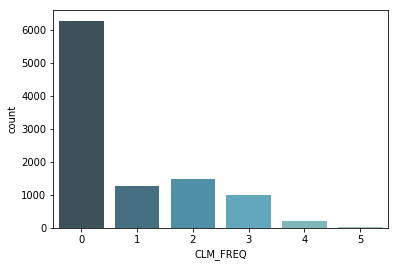

mean = 0.8004667444574096
variance = 1.3313777846567239


In [66]:
# plot claim frquncy 
print(claims['CLM_FREQ'].value_counts())
sns.countplot(x='CLM_FREQ', data=claims, palette='GnBu_d')
plt.show()
print("mean = " + str(claims['CLM_FREQ'].mean()))
print("variance = " + str(claims['CLM_FREQ'].var()))

#### This variable is also very 'skewed' where the majority of drivers did not raise a claim at all. 

In [67]:
# We convert this variable into a binary variable 
claims['CLM_FREQ'] = claims['CLM_FREQ'].apply(lambda x:1 if x>0 else 0)

In [68]:
#percange of claim in the data  
lab = claims["CLM_FREQ"].value_counts().keys().tolist()
val = claims["CLM_FREQ"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'tomato' ,'Darkgrey'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Percentage of claims in the data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

#### 61% of peaple are less likly to claim inssuarance 

In [69]:
claims.groupby('CLM_FREQ').mean()

,ID,KIDSDRIV,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,OLDCLAIM,CLM_AMT,CAR_AGE
CLM_FREQ,,,,,,,,,,,
0,5.519996e+08,0.151067,0.672238,9.989971,60515.659185,156899.640879,33.410856,15980.340656,0.000000,1000.967526,8.395734
1,5.511954e+08,0.197401,0.796102,9.783108,54475.483258,128483.325337,33.432534,15149.100450,10370.989755,2314.576462,8.089705


#### On Avrage peaple who travel more than 30 mintues daily , have been owning the car for 8 years , have a higher claim frequancy

Text(0,0.5,'Claim frequency Yes/No')

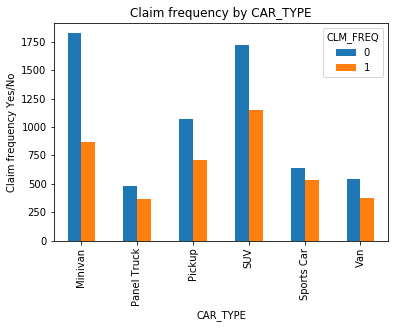

In [70]:
# looking at some categorical variables 
pd.crosstab(claims['CAR_TYPE'],claims['CLM_FREQ']).plot(kind='bar', stacked=False)
plt.title('Claim frequency by CAR_TYPE')
plt.xlabel('CAR_TYPE')
plt.ylabel('Claim frequency Yes/No')

Minivan and SUV owners tend to rais more claims

Text(0,0.5,'Claim frequency')

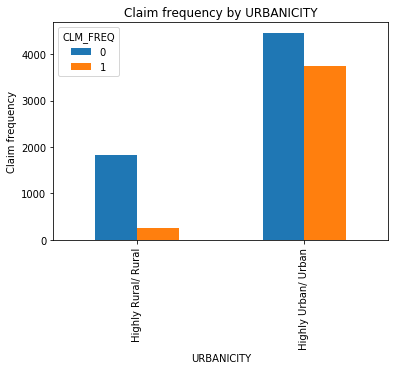

In [71]:
pd.crosstab(claims['URBANICITY'],claims['CLM_FREQ']).plot(kind='bar', stacked=False)
plt.title('Claim frequency by URBANICITY')
plt.xlabel('URBANICITY')
plt.ylabel('Claim frequency')

 Peple who live in Rural areas hardly ever make a claim 

Text(0,0.5,'Claim frequency')

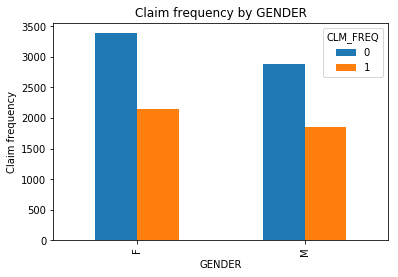

In [72]:
pd.crosstab(claims['GENDER'],claims['CLM_FREQ']).plot(kind='bar', stacked=False)
plt.title('Claim frequency by GENDER')
plt.xlabel('GENDER')
plt.ylabel('Claim frequency')

 Males tend to rais more claims but the difference isn't too big 

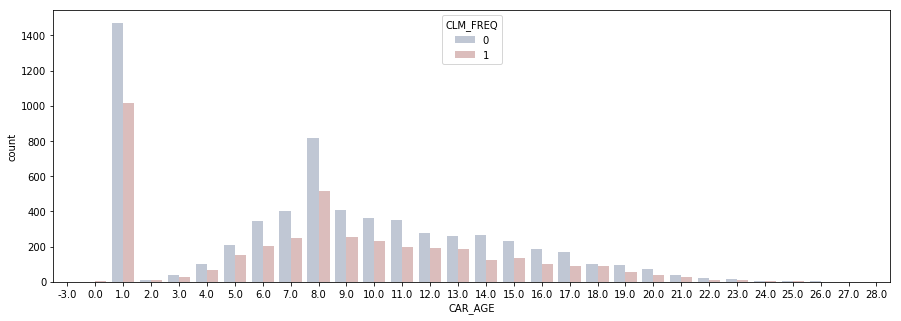

In [73]:
#Visualize car Age

plt.figure(figsize = (15,5))
sns.countplot(claims.CAR_AGE, hue = claims.CLM_FREQ, palette="vlag")

This figure  shows that claims tend to occure amonges newere cars.

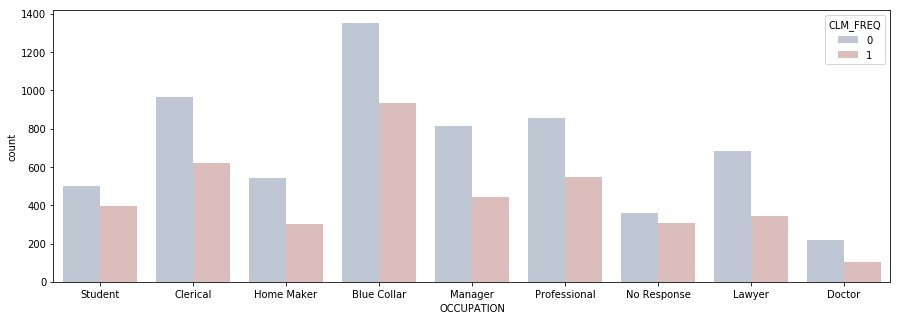

In [74]:
#Visualize OCCUPATION
plt.figure(figsize = (15,5))
sns.countplot(claims.OCCUPATION, hue = claims.CLM_FREQ, palette="vlag")

Doctors have the least tendeny to rais claims, and the vast majortiy of claims come from blue collars workers. 

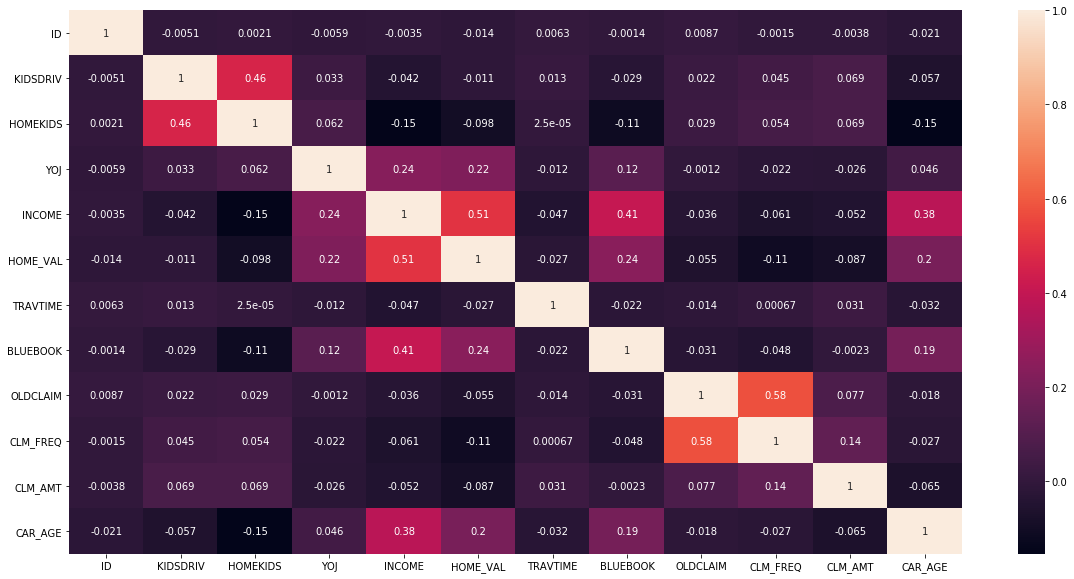

In [75]:
#Correlation matrix

def show_correlations(claims, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = claims.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(claims,show_chart=True)

In [76]:
# Looking at correlation table for the target variable 
pd.DataFrame(claims.corr()['CLM_FREQ'].sort_values(ascending=False))


,CLM_FREQ
CLM_FREQ,1.000000
OLDCLAIM,0.578742
CLM_AMT,0.135446
HOMEKIDS,0.054111
KIDSDRIV,0.044698
TRAVTIME,0.000666
ID,-0.001510
YOJ,-0.021778
CAR_AGE,-0.026969
BLUEBOOK,-0.048069


High correlation between claim freq and oldclaim
high correlation between income and home value
Income and bluebook value 



#### We use Pearson correlation method to select the features that are highly correlated with our target 

Correlation matrix helps us determine which features we should include in our analysis, it also helps us deduct collinearity. We can see from the results above , OLDclaim is the only variable That has a high correlation with the our target
We can also observe that Income and Home value are correlated ( 0.51).We will drop them both as they don't correlate with our target and to avoid any issue that collinearity may cause us. 

#### We exmine relationship more closly 

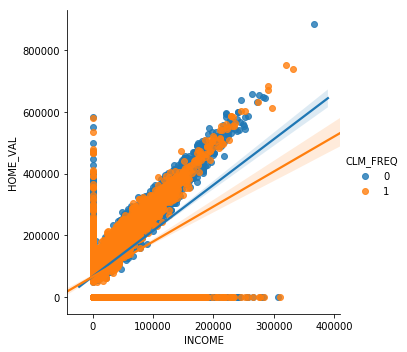

In [77]:
sns.lmplot(x="INCOME", y="HOME_VAL", hue="CLM_FREQ", data=claims)

 We can see the strong liner relationship between Income and home value.

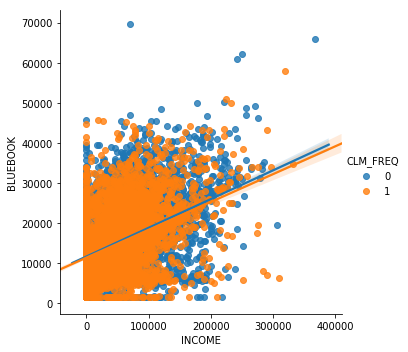

In [78]:
sns.lmplot(x="INCOME", y="BLUEBOOK", hue="CLM_FREQ", data=claims)

 we also observe an upward trend here 

In [79]:
#Exploring categorical variables 
claims.describe(include = 'object')

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,URBANICITY
count,10284,10284,10284,10284,10284,10284,10284,10284,10284
unique,6543,2,2,2,4,9,2,6,2
top,10/20/60,No,Yes,F,High School,Blue Collar,Private,SUV,Highly Urban/ Urban
freq,8,8941,6176,5538,4464,2286,6497,2877,8214


#### From this table , we observe the following :
 - Most drivers are married female 
 - Have High school education
 - Blue collar occupation
 - Car type is SUV
 - Live in Urban areas 

### Data Pre-processing

- Encode categorical varibales
- Balance the dataset using SMO to insure that we don't have a biased model 
- Feature Selection using Recursive Feature Elimination (RFE) & Lasso¶

In [96]:
# drop the unnessary columns
claims1=claims[['ID','INCOME','YOJ','OCCUPATION','TRAVTIME','CAR_USE','CAR_TYPE','OLDCLAIM','CLM_FREQ','CAR_AGE','URBANICITY']]

In [97]:
# creat dummy variables 
claims_data = pd.get_dummies(claims1, drop_first=True)
claims_data.columns.values

array(['ID', 'INCOME', 'YOJ', 'TRAVTIME', 'OLDCLAIM', 'CLM_FREQ',
       'CAR_AGE', 'OCCUPATION_Clerical', 'OCCUPATION_Doctor',
       'OCCUPATION_Home Maker', 'OCCUPATION_Lawyer', 'OCCUPATION_Manager',
       'OCCUPATION_No Response', 'OCCUPATION_Professional',
       'OCCUPATION_Student', 'CAR_USE_Private', 'CAR_TYPE_Panel Truck',
       'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car',
       'CAR_TYPE_Van', 'URBANICITY_Highly Urban/ Urban'], dtype=object)

In [136]:
# select features and target and assign them to corresponding variables
Y = claims_data['CLM_FREQ']
X = claims_data.drop('CLM_FREQ', axis=1)

In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

### Over-sampling using SMOTE
 With our training data created, I’ll up-sample the no-claim using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
- Works by creating synthetic samples from the minor class (no-claim) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [120]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio=1.0)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


Now we have a perfect balanced data

### Feature Selection using Recursive Feature Elimination (RFE) & Lasso


In [122]:
#RFE selection
logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)



[ True  True  True  True  True  True False False  True False False  True
 False False  True False False False False False  True]
[ 1  1  1  1  1  1  2 10  1  4  5  1  9 11  1  3  8  7  6 12  1]


In [123]:
# print out column names
X_rfe = X_train[X_train.columns[rfe.support_]]
print (X_rfe.columns)


Index(['ID', 'INCOME', 'YOJ', 'TRAVTIME', 'OLDCLAIM', 'CAR_AGE',
       'OCCUPATION_Home Maker', 'OCCUPATION_No Response', 'CAR_USE_Private',
       'URBANICITY_Highly Urban/ Urban'],
      dtype='object')


In [138]:
# lasso selection 
rlasso = RandomizedLasso(scaling=0.025)
rlasso.fit(X_train,y_train)

print(rlasso.scores_)

[0.115 0.47  0.42  0.415 1.    0.415 0.405 0.345 0.41  0.4   0.455 0.405
 0.285 0.475 0.55  0.37  0.325 0.55  0.485 0.315 0.585]


In [139]:
# print out column names
X_lasso = X_train[X_train.columns[rlasso.scores_ >= 0.45]]
print(X_lasso.columns)

Index(['INCOME', 'OLDCLAIM', 'OCCUPATION_Manager', 'OCCUPATION_Student',
       'CAR_USE_Private', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car',
       'URBANICITY_Highly Urban/ Urban'],
      dtype='object')


### General Linear Models, We will run a Negative binomial model to test the results of our feature selection 


In [151]:
# model Negative binomial with RFE features
glm_binom1 = sm.GLM(y_train, X_rfe, family=sm.families.NegativeBinomial())
res = glm_binom1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CLM_FREQ   No. Observations:                 7198
Model:                            GLM   Df Residuals:                     7188
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5538.9
Date:                Sat, 14 Mar 2020   Deviance:                       3370.1
Time:                        20:48:55   Pearson chi2:                 3.04e+03
No. Iterations:                    12   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ID                             -6.565e-10   7.92e-11     -8.292      0.000   -8.12e-10   -5

In [150]:
# model Negative binomial with Lasso features
glm_binom1 = sm.GLM(y_train,X_lasso, family=sm.families.NegativeBinomial())
res = glm_binom1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               CLM_FREQ   No. Observations:                 7198
Model:                            GLM   Df Residuals:                     7190
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5719.9
Date:                Sat, 14 Mar 2020   Deviance:                       3732.1
Time:                        20:48:17   Pearson chi2:                 3.16e+03
No. Iterations:                    12   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
INCOME                          -8.49e-06   5.14e-07    -16.520      0.000    -9.5e-06   -7

#### The p-values for most of the variables are smaller than 0.05

In [159]:
X1=X_rfe

### Over-sampling using SMOTE
 With our training data created, I’ll up-sample the no-claim using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
- Works by creating synthetic samples from the minor class (no-claim) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [163]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X1, y_train)

In [174]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_res, y_train_res , test_size=0.25, random_state=11)


### Model Building & Evaluation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [176]:
# We will look at different models, our firsit choice is Logistic regression 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train1,y_train1.ravel()) 
  
predictions = lr.predict(X_test1) 
  
# print classification report 
print(classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1078
           1       1.00      0.97      0.98      1131

   micro avg       0.98      0.98      0.98      2209
   macro avg       0.98      0.98      0.98      2209
weighted avg       0.99      0.98      0.98      2209



“Confusion Metrics” is a great tool to evaluate our model 
- Precision: the ratio of correctly predicted positive observations to the total predicted positive observations. we have got 100% precision
- Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations ( peaple who are likly to claim) we have got 97%


### The next model we try is Random forest, we use cross_val_score to make sure theres no overfir and GridSearchCV to tune ourmodel

In [182]:
# fitting the model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV


In [183]:
Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train1,y_train1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [186]:
#Make predictions 
Prediction_RF=Rfclf.predict(X_test1)
Prediction_RF

array([1, 0, 0, ..., 1, 0, 1])

In [188]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train1,y_train1, cv=10)
print(clf_score)
clf_score.mean()

[1.        1.        0.9984917 1.        1.        1.        1.
 1.        1.        1.       ]


0.9998491704374057

In [190]:
# Check recall score for RandomForest

recall_score(Prediction_RF,y_test1)

1.0

The recall score is 100%

### We have tested out several models and Random forest scored the highest recall accuracy,Despite having the highest accuracy we will go with logistic regression because it's easy to interpret to peaple with no DC knowledge. Especially in the inssurance industry

In [193]:
# Save prediction to csv
predictions1=pd.DataFrame(predictions)


In [201]:
# save predictions to csv file 
predictions1.to_csv("predictions.csv")

#### Findings & Recommendations 

The objective of this project was to predict the future claim frequancy for policyholder,we successfully tested out several models that identify the parameters which impact claim frequancy and got good results.The ultimate goal is to turn this model into a rating plan, hence our model of choice is logistic regression, becaue it's easy to interpret. 

Here are our findings:

- The most important factors in predicting claim frequency is OLD CLAIM.
- Policyholders that drive in Highly Urban areas tend to have a higher claim frequancy. 
- The likelihood of a home maker raising a claim is higher than any other occupation. 
- The longer the car age , the higher the frequancy of getting a claim.
- Income does not affect claim frequancy. 

These factors will also help determine the customers who are at risks.  



